# Quantum Simulation of Tunneling through an Eckart Barrier

In [1]:
from walsh_evolution import *
import sys
sys.path.insert(0, './../classical/')
from classical_evolution import *
normalize = lambda x: x / np.linalg.norm(x)


## Eckart Barrier Example

In [2]:
# n = 7
# N = 2**n
# L = 5
# x_grid = np.linspace(-5, 5, N)
# repeats = 10
# plot_grid = np.arange(-L, L, 2*L/(N*repeats))
# potential = lambda x: 100/np.cosh(x/.5)
# a = wft(potential, n, x_grid)
# approx = iwft(a, n, terms_kept=19)
# plt.plot(x_grid, potential(x_grid), label='analytic')
# plt.plot(plot_grid, np.repeat(approx, repeats))
# plt.show()


In [3]:
# T = .5
# K = 25
# x0 = -3.0  # Initial position
# p0 = 15.0  # Initial momentum
# sigma = 0.5
# def eckart_initial_wave_function(x):
#     val = np.exp(-(x - x0)**2 / (2 * sigma**2) + 1j*p0*(x - x0))
#     return normalize(val)

# # states, t_grid, x_grid = walsh_evolve_2(potential, eckart_initial_wave_function, n, L, K, T)
# states, t_grid, x_grid = walsh_evolve_quantum_2(potential, eckart_initial_wave_function, n, L, K, T)

# amplitudes = np.abs(states)**2
# plot_time_evolution(amplitudes, t_grid, x_grid, interpolate_plot=True)


## Quadratic Potential Example

working on time evolution: 100%|██████████| 50/50 [00:30<00:00,  1.63it/s]


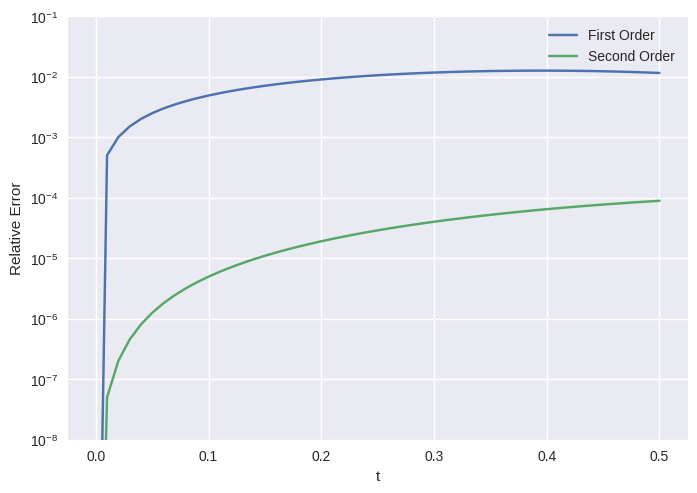

In [4]:
potential = lambda x: x**2
true_sol = lambda x, t: normalize(1/np.sqrt(2)*np.pi**(-1/4)*(2*x**2 - 1)*np.exp(-x**2/2)*np.exp(-1j*5*t))
initial_wave_function = lambda x: true_sol(x, 0)
n, K = 6, 50
T = .5
L = 8

states1, t_grid1, x_grid1 = walsh_evolve_quantum_1(potential, initial_wave_function, n, L, K, T, D=1)
states2, t_grid2, x_grid2 = walsh_evolve_quantum_2(potential, initial_wave_function, n, L, K, T, D=1)

error1 = []
error2 = []
for i in range(K + 1):
    error1.append(np.linalg.norm(np.abs(states1[i, :])**2 - np.abs(true_sol(x_grid1, t_grid1[i]))**2)/np.linalg.norm(np.abs(true_sol(x_grid1, t_grid1[i]))**2))
    error2.append(np.linalg.norm(np.abs(states2[i, :])**2 - np.abs(true_sol(x_grid2, t_grid1[i]))**2)/np.linalg.norm(np.abs(true_sol(x_grid2, t_grid2[i]))**2))

plt.semilogy(t_grid1, error1, label='First Order')
plt.semilogy(t_grid2, error2, label='Second Order')
plt.legend()
plt.xlabel('t')
plt.ylabel('Relative Error')
plt.ylim(1e-8, 1e-1)
plt.show()


working on time evolution: 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


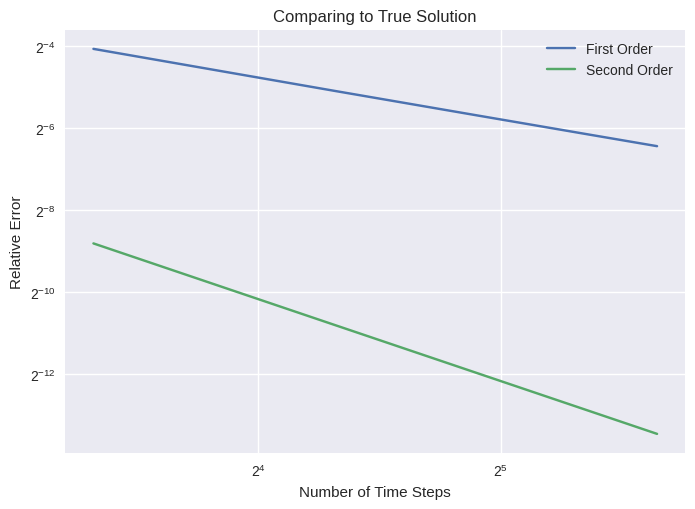

In [5]:
n = 6
k_vals = [10, 20, 30, 40, 50]
error1, error2 = [], []
i = 0


for k in k_vals:
    states1, t_grid1, x_grid1 = walsh_evolve_quantum_1(potential, initial_wave_function, n, L, k, T, D=1)
    states2, t_grid2, x_grid2 = walsh_evolve_quantum_2(potential, initial_wave_function, n, L, k, T, D=1)
    error1.append(np.linalg.norm(np.abs(states1[-1, :])**2 - np.abs(true_sol(x_grid1, t_grid1[-1]))**2)/np.linalg.norm(np.abs(true_sol(x_grid1, t_grid1[-1]))**2))
    error2.append(np.linalg.norm(np.abs(states2[-1, :])**2 - np.abs(true_sol(x_grid2, t_grid2[-1]))**2)/np.linalg.norm(np.abs(true_sol(x_grid2, t_grid2[-1]))**2))

plt.loglog(k_vals, error1, base=2, label='First Order')
plt.loglog(k_vals, error2, base=2, label='Second Order')
plt.legend()
plt.xlabel('Number of Time Steps')
plt.ylabel('Relative Error')
plt.title('Comparing to True Solution')
plt.show()
